In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import acf, pacf
#matplotlib inline

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
target = train.loss
train = train.drop('loss',1)
train_test = pd.concat((train,test))


cont1



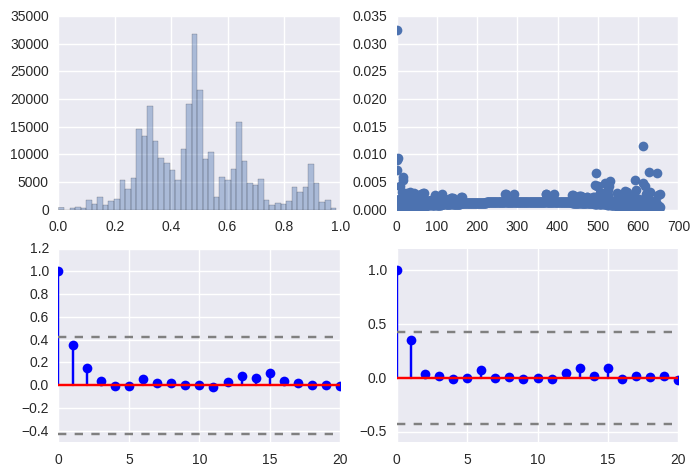


cont2



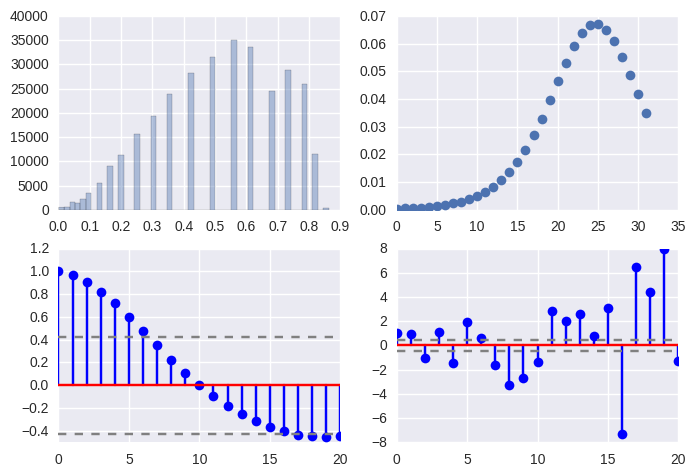


cont3



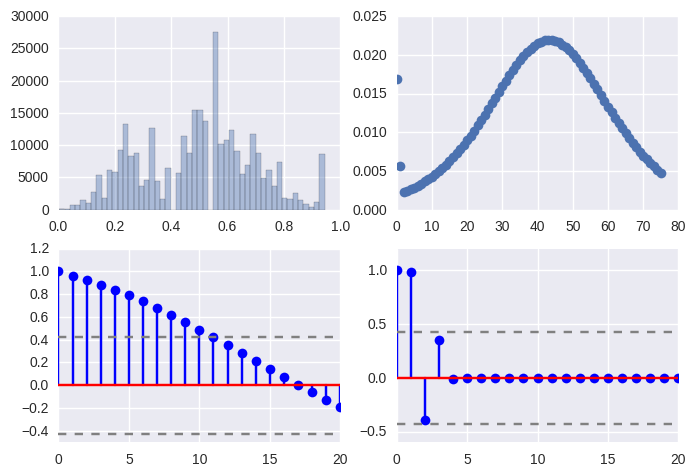


cont4



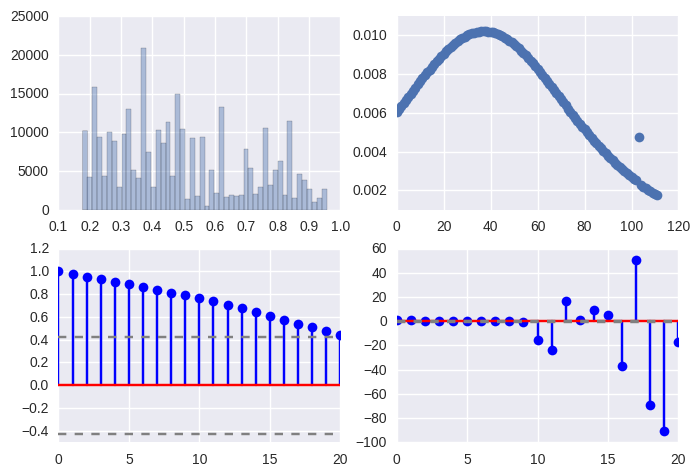


cont5



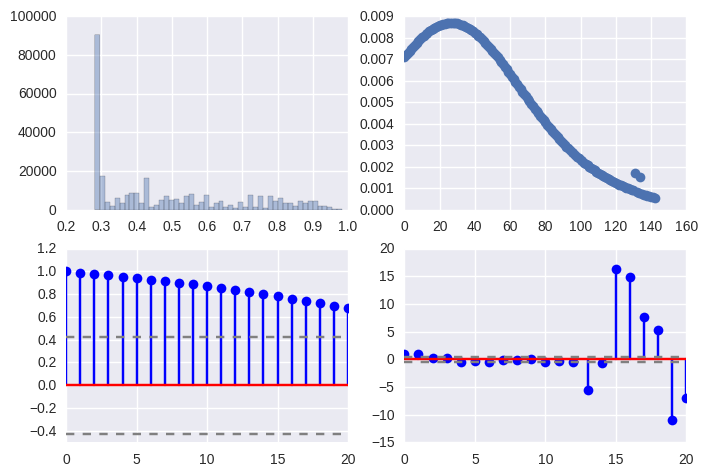


cont6



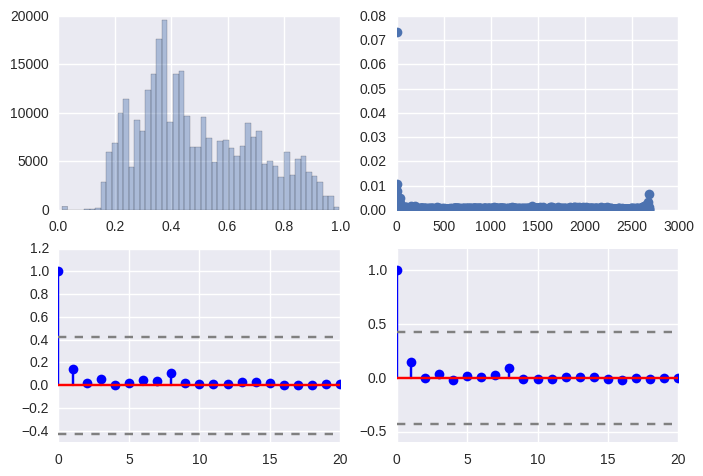


cont7



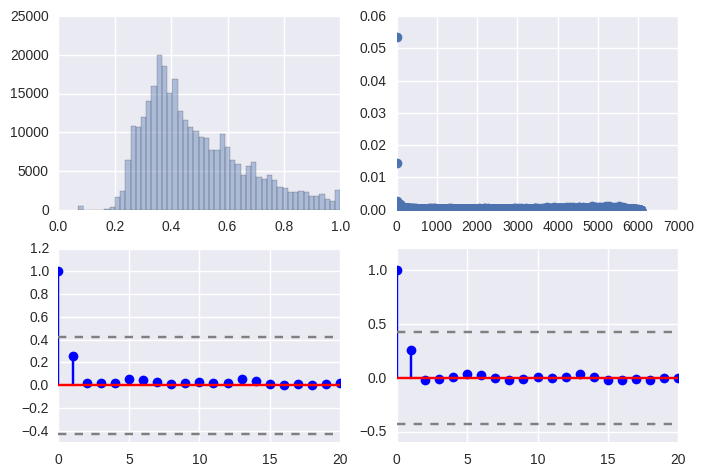


cont8



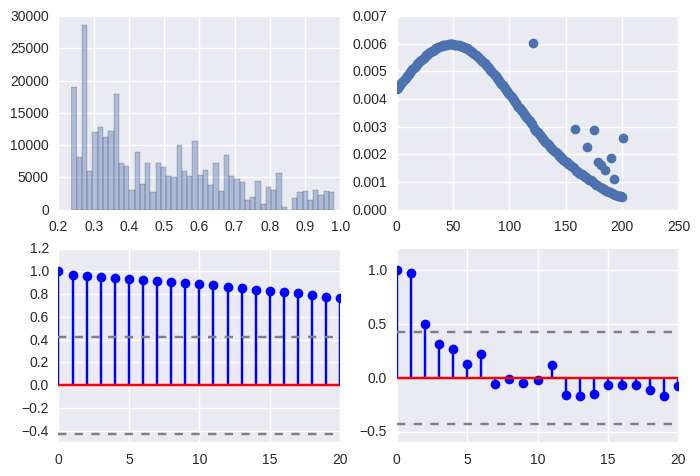


cont9



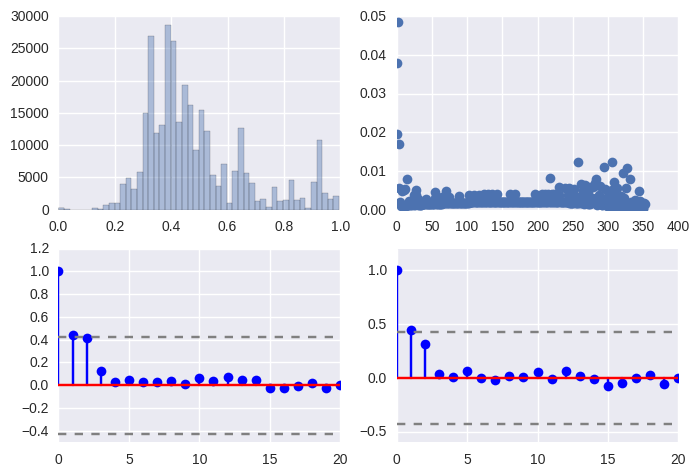


cont10



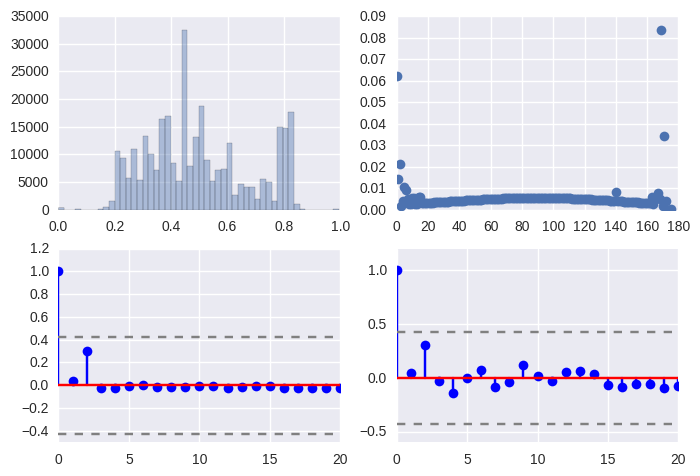


cont11



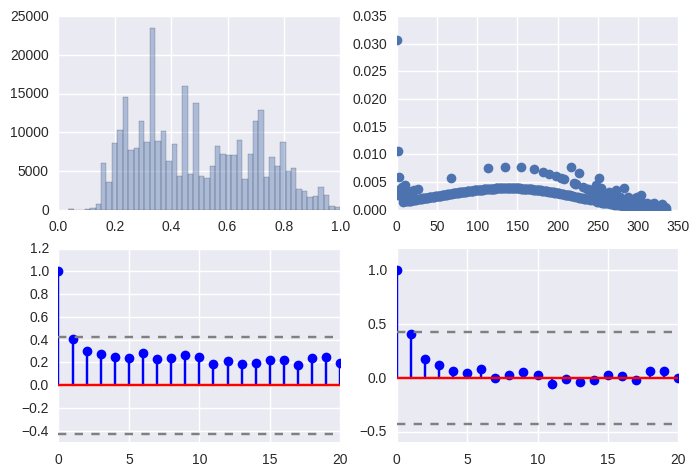


cont12



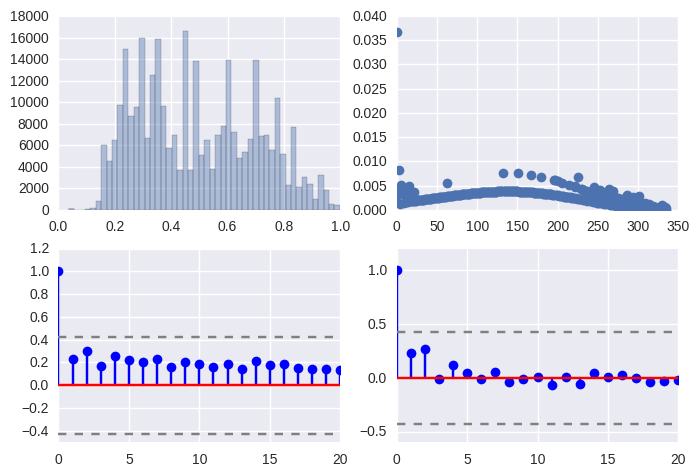


cont13



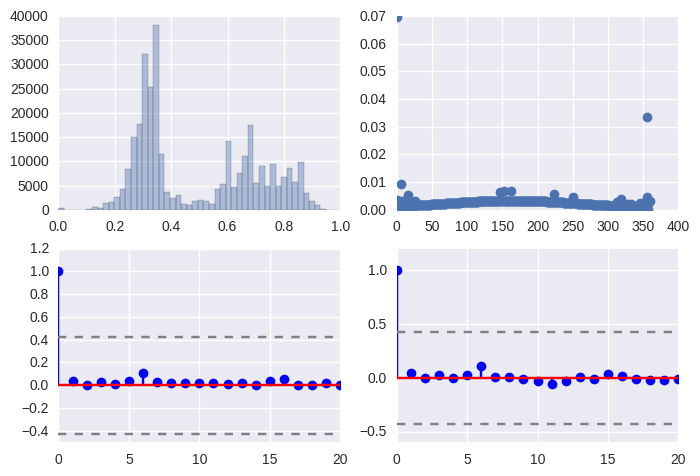


cont14



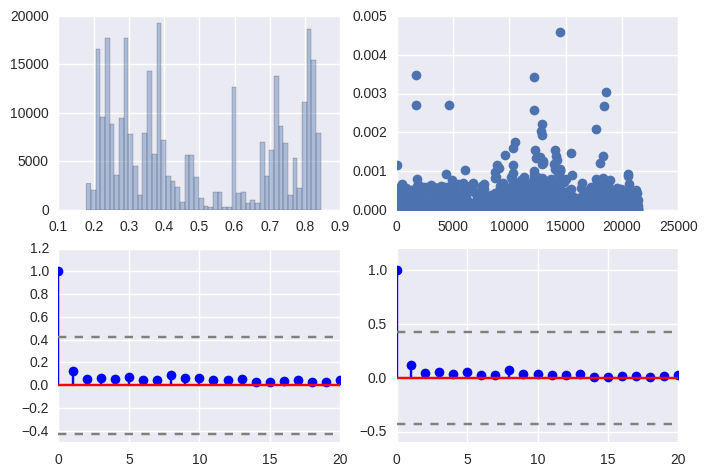

In [3]:
for cont in ["cont"+str(i) for i in range(1,15)]:
    print("\n"+cont+"\n")
    unique = pd.unique(train_test[cont])
    fig = plt.figure()
    ax1 = fig.add_subplot(221)
    sns.distplot(train_test[cont],kde=False,ax=ax1,axlabel=False)
    
    ax2 = fig.add_subplot(222)
    x = np.arange(len(unique)-1)
    diffs = np.diff(np.sort(unique))
    ax2.plot(x,diffs,'o')
    
    lag_acf = acf(diffs,nlags=20)
    ax3 = fig.add_subplot(223)
    ax3.stem(lag_acf)
    ax3.set_ylim(-0.5,1.2)
    ax3.axhline(y=-1.96/np.sqrt(len(lag_acf)),linestyle='--',color='gray')
    ax3.axhline(y=1.96/np.sqrt(len(lag_acf)),linestyle='--',color='gray')
    
    lag_pacf = pacf(diffs,nlags=20,method='ols')
    ax4 = fig.add_subplot(224)
    ax4.stem(lag_pacf)
    ax4.axhline(y=-1.96/np.sqrt(len(lag_pacf)),linestyle='--',color='gray')
    ax4.axhline(y=1.96/np.sqrt(len(lag_pacf)),linestyle='--',color='gray')
    plt.show()

In [4]:
def undistort(X, Y, dX, dY, radius, a, b, c, d = 1, imWidth = 640, imHeight = 480):
    normX = X - dX
    normY = Y - dY
    radius_u = radius
    
    r = np.sqrt(normX**2 + normY**2) /  radius_u

    Rsrc = r * (a*r**3 + b*r**2 + c*r + d)

    theta = Rsrc.apply(lambda x: 1 if x==0 else 1. / np.arctan(x) * x)

    newX =  theta * normX + (imWidth / 2) 
    newY =  theta * normY #+ (imHeight / 2)

    return newX, newY

In [5]:
orig_cont1_order = np.sort(np.unique(train_test.cont1))
diffs = np.diff(orig_cont1_order)
df1 = pd.DataFrame(columns=["X","Y"])
df1.X = range(len(diffs))
df1.Y = diffs
newX,newY = undistort(X=df1.X, Y=df1.Y, dX=650/2, dY=0, radius = 650/2, a=2, b=1, c=1, d=1, 
                    imWidth = len(diffs), imHeight = max(diffs))
df2 = pd.DataFrame(columns=["X","Y"])
df2.X = newX
df2.Y = newY

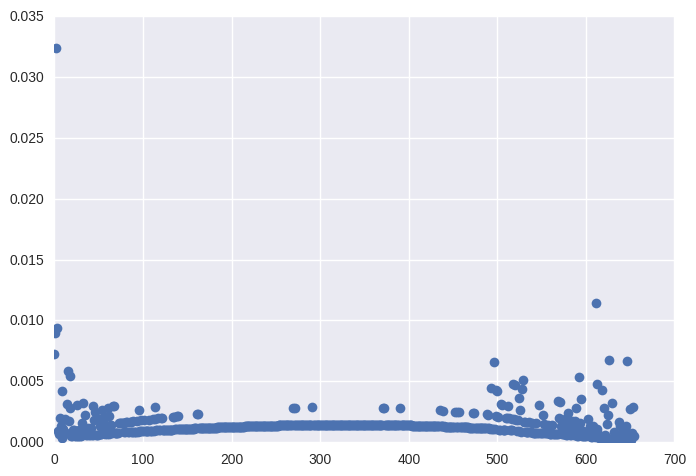

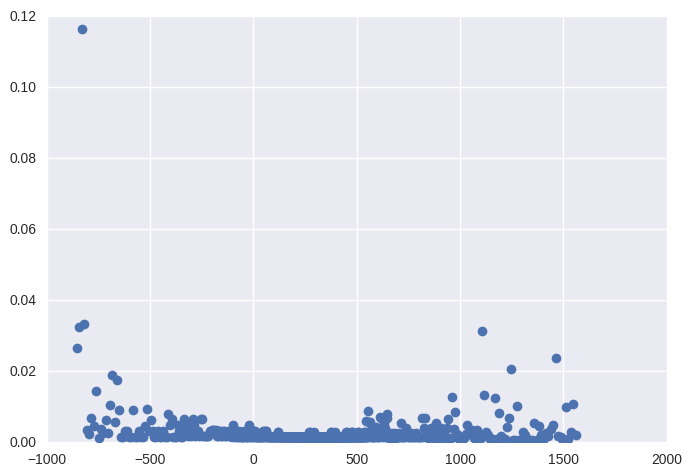

In [6]:
plt.plot(df1.X,df1.Y,'o')
plt.show()
plt.plot(df2.X,df2.Y,'o')
plt.show()

In [7]:
#Original dates
print(df1.shape[0] == df2.shape[0])
print(np.all(np.diff(df2.X)))
orig_dates = orig_cont1_order

new_dates = np.cumsum(pd.Series(0).append(df2.Y,ignore_index=True))
print(len(new_dates) == len(orig_dates))
dates_lookup_df = pd.DataFrame(np.vstack((orig_dates,new_dates)).transpose(),columns=["cont1","cont1_corr"])

True
True
True


In [8]:
train_test_corr = train_test.merge(dates_lookup_df,left_on="cont1",right_on="cont1")

In [9]:
np.argmax(pd.Series(np.round(np.diff(new_dates[1:100]),4)).value_counts())

0.0016000000000000001

In [10]:
new_dates[1]/0.0016

16.514662405549064

In [11]:
def make_my_dates(date_vector, i, window_size, digits):

    date_vector = date_vector.as_matrix()
    #you need to pick window size that is not too small (avoid local bias),
    #but not too big (to avoid warning messages from previous(non-relevant) dates)
    tmp = np.floor(i-window_size/2)
    beginning_of_window = np.maximum(1, tmp) # half the window size but not less then 1
    beginning_of_window = np.minimum(beginning_of_window, len(date_vector)-window_size) # avoid shrinking of window
    end_of_window = beginning_of_window + window_size-1 
    beginning_of_window = beginning_of_window.astype('int')
    end_of_window = end_of_window.astype('int')
    tab1 = pd.DataFrame(pd.Series(np.round(np.diff(date_vector[beginning_of_window:end_of_window]),digits)).value_counts())

    tab1 = tab1.reset_index()
    tab1.columns = ['value','freq']
    tab1.value = pd.to_numeric(tab1.value)
    most_freq_value = tab1.value[np.argmax(tab1.freq)]
    # check that most_frew_value is also within the "walking distance" from the smallest non-zero value
    min_nz_value = np.min(tab1.loc[tab1.value>0, "value"])
    # most frequent value should not be more than 2 times larger then the minimum non-zero value.
    if (most_freq_value/min_nz_value >=2):
        print("Warning! Most frequent value for element ", i, " seems too big. Frequencies from min_nz_value to most_freq_value are")
    current_lag = date_vector[i]-date_vector[i-1]
    days_equivalent = current_lag / most_freq_value
  
    return(days_equivalent)

In [12]:
#my_new_lags  sapply(2:length(new_dates), function(x) makeMyDates(new_dates, x, 45, 4))
my_new_lags = [make_my_dates(new_dates, x, 45, 4) for x in range(1,len(new_dates))]

Warning! Most frequent value for element  63  seems too big. Frequencies from min_nz_value to most_freq_value are
Warning! Most frequent value for element  64  seems too big. Frequencies from min_nz_value to most_freq_value are
Warning! Most frequent value for element  65  seems too big. Frequencies from min_nz_value to most_freq_value are
Warning! Most frequent value for element  66  seems too big. Frequencies from min_nz_value to most_freq_value are
Warning! Most frequent value for element  67  seems too big. Frequencies from min_nz_value to most_freq_value are
Warning! Most frequent value for element  68  seems too big. Frequencies from min_nz_value to most_freq_value are
Warning! Most frequent value for element  69  seems too big. Frequencies from min_nz_value to most_freq_value are
Warning! Most frequent value for element  70  seems too big. Frequencies from min_nz_value to most_freq_value are
Warning! Most frequent value for element  71  seems too big. Frequencies from min_nz_val

In [13]:
norm_new_dates = np.round(np.cumsum(np.append(0,  my_new_lags)),0).astype('int') # return integer dates
print(len(orig_dates),len(norm_new_dates))

656 656


In [16]:
dates_lookup_df = pd.DataFrame(np.vstack((orig_dates, norm_new_dates)).transpose(),columns=['cont1','cont1_norm_corr'])
train_test_corr = train_test.merge(dates_lookup_df, left_on = "cont1",right_on="cont1")
dates_lookup_df = pd.DataFrame(np.vstack((orig_dates, new_dates)).transpose(),columns=['cont1','cont1_corr'])
train_test_corr = train_test_corr.merge(dates_lookup_df, left_on = "cont1",right_on="cont1")

In [17]:
train_test_corr.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,cont1_norm_corr,cont1_corr
0,1,A,B,A,B,A,A,A,A,B,...,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,765.0,1.161852
1,24,A,B,A,A,B,B,A,A,B,...,0.469223,0.30260,0.67135,0.83510,0.863052,0.879347,0.822493,0.294523,765.0,1.161852
2,1256,A,B,A,A,B,A,A,A,B,...,0.517050,0.60087,0.67135,0.83510,0.872013,0.879347,0.861364,0.239581,765.0,1.161852
3,2060,A,B,A,B,B,B,A,A,B,...,0.469223,0.30260,0.67135,0.83510,0.863052,0.879347,0.822493,0.615675,765.0,1.161852
4,5893,B,A,A,A,B,A,A,A,A,...,0.760507,0.68823,0.71934,0.81591,0.837272,0.826178,0.870644,0.721851,765.0,1.161852


In [18]:
train_test_corr[["id","cont1_norm_corr","cont1_corr"]].to_csv('data/cont1_asdate.csv',index=False)